In [1]:
!pip install earthengine-api


In [2]:
import ee
import geemap
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:


# Authenticate and initialize the Earth Engine API.
ee.Authenticate()
ee.Initialize(project='ee-mayuritangade05')

def load_geojson(geojson_file):
    """Load a GeoJSON file and return the geometry."""
    with open(geojson_file) as f:
        geojson = json.load(f)
    return ee.Geometry(geojson['features'][0]['geometry'])

In [4]:
def get_surface_water_extent(geometry, start_date, end_date):
    """Calculate surface water extent time series for the given geometry and time range."""
    # Load the JRC Yearly Water Classification History dataset
    dataset = ee.ImageCollection('JRC/GSW1_4/YearlyHistory')

    # Filter the dataset by date
    filtered_dataset = dataset.filterDate(start_date, end_date)

    # Define a function to calculate the water extent for each image
    def calculate_water_extent(image):
        water = image.select('waterClass').eq(2)  # Water class code 2 represents permanent water
        water_area = water.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=geometry,
            scale=30,
            maxPixels=1e10
        )
        date = ee.Date(image.get('system:time_start')).format('YYYY-MM-dd')
        return ee.Feature(None, {'date': date, 'water_area': water_area.get('waterClass')})

    # Map the function over the filtered dataset
    water_extent_series = filtered_dataset.map(calculate_water_extent).getInfo()

    # Extract the time series data
    time_series = [{'date': f['properties']['date'], 'water_area': f['properties']['water_area']} for f in water_extent_series['features']]

    return pd.DataFrame(time_series)

In [5]:
def plot_time_series(df):
    """Plot the surface water extent time series."""
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.plot(kind='line', y='water_area', legend=False)
    plt.title('Surface Water Extent Time Series')
    plt.xlabel('Date')
    plt.ylabel('Water Area (square meters)')
    plt.show()

In [6]:
# Example usage:
geojson_file = '/content/Surface_waterBody.geojson'
start_date = '2000-01-01'
end_date = '2021-12-31'

In [7]:
geometry = load_geojson(geojson_file)

In [8]:
# Get the surface water extent time series
df = get_surface_water_extent(geometry, start_date, end_date)

In [9]:
df

,date,water_area
0,2000-01-01,1.663385e+06
1,2001-01-01,4.538877e+05
2,2002-01-01,1.003731e+06
3,2003-01-01,8.576263e+05
4,2004-01-01,1.040907e+06
5,2005-01-01,1.800862e+06
6,2006-01-01,9.873275e+05
7,2007-01-01,2.507200e+06
8,2008-01-01,9.449611e+05
9,2009-01-01,9.216183e+05


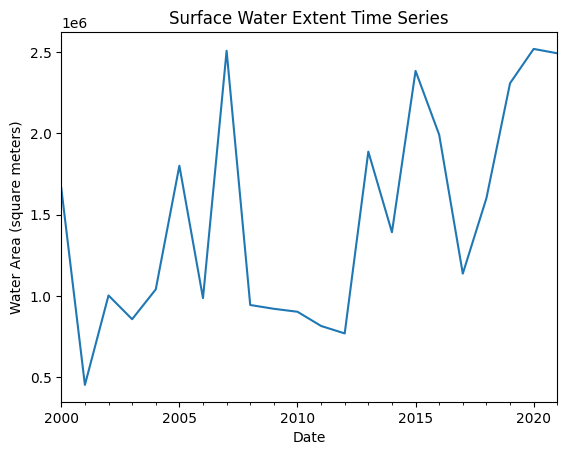

In [10]:
plot_time_series(df)

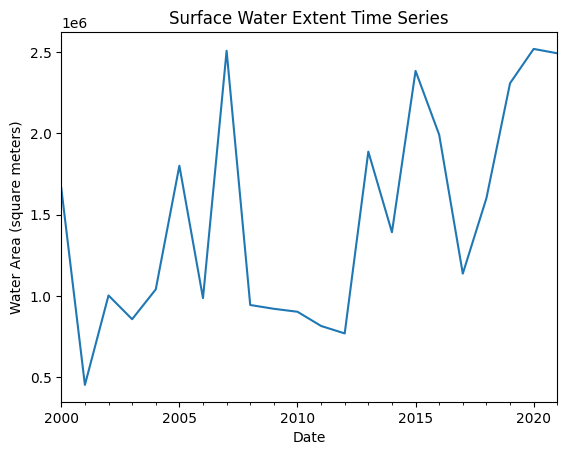

In [11]:
import ee
import geemap
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Authenticate and initialize the Earth Engine API.
ee.Authenticate()
ee.Initialize()

def load_geojson(geojson_file):
    """Load a GeoJSON file and return the geometry."""
    with open(geojson_file) as f:
        geojson = json.load(f)
    return ee.Geometry(geojson['features'][0]['geometry'])

def get_surface_water_extent(geometry, start_date, end_date):
    """Calculate surface water extent time series for the given geometry and time range."""
    # Load the JRC Yearly Water Classification History dataset
    dataset = ee.ImageCollection('JRC/GSW1_4/YearlyHistory')

    # Filter the dataset by date
    filtered_dataset = dataset.filterDate(start_date, end_date)

    # Define a function to calculate the water extent for each image
    def calculate_water_extent(image):
        water = image.select('waterClass').eq(2)  # Water class code 2 represents permanent water
        water_area = water.multiply(ee.Image.pixelArea()).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=geometry,
            scale=30,
            maxPixels=1e10
        ).get('waterClass')
        date = ee.Date(image.get('system:time_start')).format('YYYY-MM-dd')
        return ee.Feature(None, {'date': date, 'water_area': water_area})

    # Map the function over the filtered dataset
    water_extent_series = filtered_dataset.map(calculate_water_extent).getInfo()

    # Extract the time series data
    time_series = []
    for feature in water_extent_series['features']:
        properties = feature['properties']
        time_series.append({'date': properties['date'], 'water_area': properties['water_area']})

    return pd.DataFrame(time_series)

def plot_time_series(df):
    """Plot the surface water extent time series."""
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df.plot(kind='line', y='water_area', legend=False)
    plt.title('Surface Water Extent Time Series')
    plt.xlabel('Date')
    plt.ylabel('Water Area (square meters)')
    plt.show()

# Example usage:
geojson_file = '/content/Surface_waterBody.geojson'
start_date = '2000-01-01'
end_date = '2021-12-31'

geometry = load_geojson(geojson_file)

# Get the surface water extent time series
df = get_surface_water_extent(geometry, start_date, end_date)

# Plot the time series
plot_time_series(df)


In [12]:
df

,water_area
date,
2000-01-01,1.663385e+06
2001-01-01,4.538877e+05
2002-01-01,1.003731e+06
2003-01-01,8.576263e+05
2004-01-01,1.040907e+06
2005-01-01,1.800862e+06
2006-01-01,9.873275e+05
2007-01-01,2.507200e+06
2008-01-01,9.449611e+05


In [13]:
import ee
import geemap
import json

# Authenticate and initialize the Earth Engine API.
ee.Authenticate()
ee.Initialize()

def load_geojson(geojson_file):
    """Load a GeoJSON file and return the geometry."""
    with open(geojson_file) as f:
        geojson = json.load(f)
    return ee.Geometry(geojson['features'][0]['geometry'])

def visualize_water_extent(geometry, start_date, end_date):
    """Visualize water extent using false color composite maps."""
    # Load the JRC Monthly Water History dataset
    dataset = ee.ImageCollection('JRC/GSW1_4/MonthlyHistory')

    # Filter the dataset by date
    filtered_dataset = dataset.filterDate(start_date, end_date)

    # Calculate the median image to visualize the water extent over the period
    median_image = filtered_dataset.median().clip(geometry)

    # Define visualization parameters for the water band
    vis_params = {
        'bands': ['water'],
        'min': 0,
        'max': 2,
        'palette': ['ffffff', '0000ff']  # white for no water, blue for water
    }

    # Create a map
    Map = geemap.Map()

    # Center the map on the geometry
    Map.centerObject(geometry, 10)

    # Add the water extent layer to the map
    Map.addLayer(median_image, vis_params, 'Water Extent')

    # Add the geometry layer to the map
    Map.addLayer(geometry, {'color': 'blue'}, 'Geometry')

    # Add layer control
    Map.addLayerControl()

    return Map

# Example usage:
geojson_file = '/content/Surface_waterBody.geojson'
start_date = '2000-01-01'
end_date = '2021-12-31'

geometry = load_geojson(geojson_file)

# Visualize the water extent
Map = visualize_water_extent(geometry, start_date, end_date)
Map


Map(center=[14.929864909135226, 75.86423758730494], controls=(WidgetControl(options=['position', 'transparent_…

In [15]:
import ee
import geemap
import json

# Authenticate and initialize the Earth Engine API.
ee.Authenticate()
ee.Initialize()

def load_geojson(geojson_file):
    """Load a GeoJSON file and return the geometry."""
    with open(geojson_file) as f:
        geojson = json.load(f)
    return ee.Geometry(geojson['features'][0]['geometry'])

def visualize_water_extent_by_year(geometry, start_date, end_date):
    """Visualize water extent changes by year using an animation."""
    # Load the JRC Monthly Water History dataset
    dataset = ee.ImageCollection('JRC/GSW1_4/MonthlyHistory')

    # Filter the dataset by date
    filtered_dataset = dataset.filterDate(start_date, end_date)

    # Define visualization parameters for the water band
    vis_params = {
        'bands': ['water'],
        'min': 0,
        'max': 2,
        'palette': ['ffffff', '0000ff']  # white for no water, blue for water
    }

    # Create a map
    Map = geemap.Map()

    # Center the map on the geometry
    Map.centerObject(geometry, 10)

    # Add the geometry layer to the map
    Map.addLayer(geometry, {'color': 'blue'}, 'Geometry')

    # Define the animation parameters
    video_args = {
        'dimensions': 768,
        'region': geometry,
        'framesPerSecond': 10,
        'min': 0,
        'max': 2,
        'palette': ['ffffff', '0000ff']  # white for no water, blue for water
    }

    # Add the water extent animation to the map for each year
    for year in range(int(start_date[:4]), int(end_date[:4])+1):
        year_filtered_dataset = filtered_dataset.filterDate(str(year), str(year+1))
        Map.addLayer(year_filtered_dataset, vis_params, 'Water Extent ' + str(year), False)

    Map.addLayerControl()
    Map.setCenter(78.5000, 22.2000, 10)
    Map.addLayer(ee.Image().paint(geometry, 0, 2), {}, 'AOI')
    Map.addLayerControl()
    return Map

# Example usage:
geojson_file = '/content/Surface_waterBody.geojson'
start_date = '2000-01-01'
end_date = '2021-12-31'

geometry = load_geojson(geojson_file)

# Visualize the water extent changes for each year over the specified time period
Map = visualize_water_extent_by_year(geometry, start_date, end_date)
Map



Map(center=[22.2, 78.5], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

In [17]:
import ee
import geemap
import json

# Authenticate and initialize the Earth Engine API.
ee.Authenticate()
ee.Initialize()

def load_geojson(geojson_file):
    """Load a GeoJSON file and return the geometry."""
    with open(geojson_file) as f:
        geojson = json.load(f)
    return ee.Geometry(geojson['features'][0]['geometry'])

def visualize_water_extent_by_year(geometry, start_date, end_date, out_gif):
    """Visualize water extent changes by year using an animation."""
    # Load the JRC Monthly Water History dataset
    dataset = ee.ImageCollection('JRC/GSW1_4/MonthlyHistory')

    # Filter the dataset by date
    filtered_dataset = dataset.filterDate(start_date, end_date)

    # Define visualization parameters for the water band
    vis_params = {
        'bands': ['water'],
        'min': 0,
        'max': 2,
        'palette': ['ffffff', '0000ff']  # white for no water, blue for water
    }

    # Create a map
    Map = geemap.Map()

    # Center the map on the geometry
    Map.centerObject(geometry, 10)

    # Add the geometry layer to the map
    Map.addLayer(geometry, {'color': 'blue'}, 'Geometry')

    # Create a list to hold the image collection of each year
    annual_images = []

    for year in range(int(start_date[:4]), int(end_date[:4]) + 1):
        year_start = str(year) + '-01-01'
        year_end = str(year) + '-12-31'
        year_filtered_dataset = filtered_dataset.filterDate(year_start, year_end).mean().clip(geometry)
        annual_images.append(year_filtered_dataset.set('year', year))

    # Create an image collection from the annual images
    annual_collection = ee.ImageCollection.fromImages(annual_images)

    # Define the animation parameters
    video_args = {
        'dimensions': 768,
        'region': geometry,
        'framesPerSecond': 1,
        'min': 0,
        'max': 2,
        'palette': ['ffffff', '0000ff'],  # white for no water, blue for water
        'title': 'Year: {year}',
        'fontSize': 30,
        'fontColor': 'white',
        'fontOutlineColor': 'black'
    }

    # Export the animation
    out_gif = out_gif if out_gif.endswith('.gif') else out_gif + '.gif'
    geemap.download_ee_video(annual_collection, video_args, out_gif)

    # Add the water extent layers to the map for each year
    for year_image in annual_images:
        year = year_image.get('year').getInfo()
        Map.addLayer(year_image, vis_params, f'Water Extent {year}')

    return Map

# Example usage:
geojson_file = 'Surface_waterBody.geojson'
start_date = '2000-01-01'
end_date = '2021-12-31'
out_gif = 'water_extent_animation.gif'

geometry = load_geojson(geojson_file)

# Visualize the water extent changes for each year over the specified time period
Map = visualize_water_extent_by_year(geometry, start_date, end_date, out_gif)
Map


Generating URL...
Please wait ...
The GIF image has been saved to: /content/water_extent_animation.gif


Map(center=[14.929864909135226, 75.86423758730494], controls=(WidgetControl(options=['position', 'transparent_…